In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

from utils.data import load_df, load_df_with_names


In [6]:
df_an = pd.read_csv('data/valve1/6.csv', 
                          sep=';', 
                          index_col='datetime', 
                          parse_dates=True)
df_an.index[df_an.anomaly==1][-1]

Timestamp('2020-03-09 12:31:36')

In [2]:
df_an = pd.read_csv('data/valve1/6.csv', 
                          sep=';', 
                          index_col='datetime', 
                          parse_dates=True)
df_an_fr = pd.read_csv('data/anomaly-free/anomaly-free.csv', 
                          sep=';', 
                          index_col='datetime', 
                          parse_dates=True)
healthy_pref_len = 400
healthy_prefix = df_an[:healthy_pref_len]



In [4]:
def get_healthy_prefix_len(df): return df.index.get_loc(df[df.anomaly==1].index[0])

# Original. Non-Differentiated

#### valve 1 & anomaly_free

In [7]:
list_of_df, _, file_names = load_df_with_names("./data/", "valve1")


In [5]:
features = list_of_df[0].columns
features = ['Accelerometer1RMS', 'Accelerometer2RMS', 'Current', 'Pressure',
       'Temperature', 'Thermocouple', 'Voltage', 'Volume Flow RateRMS']

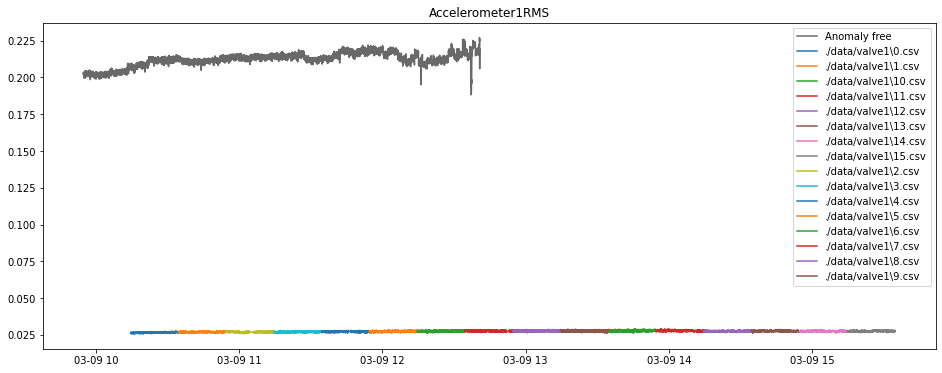

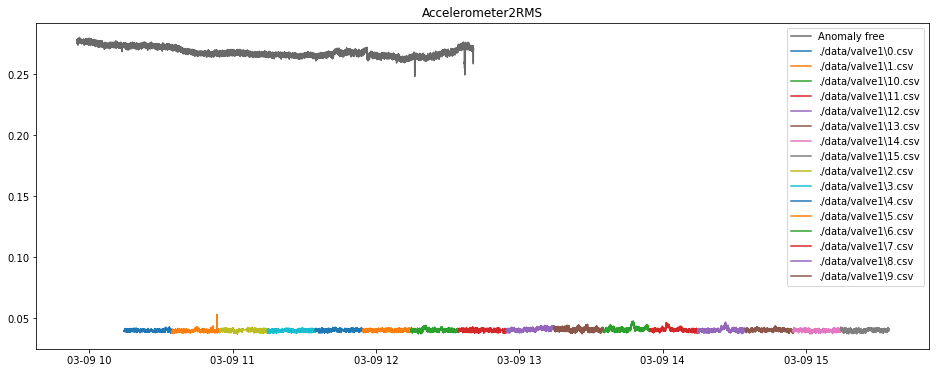

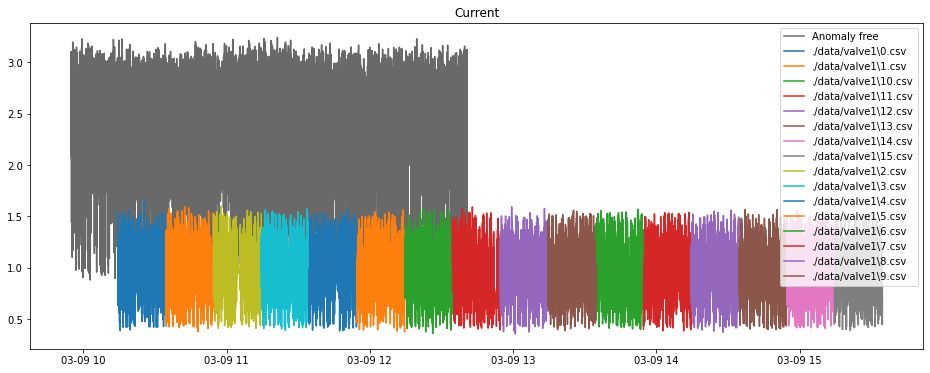

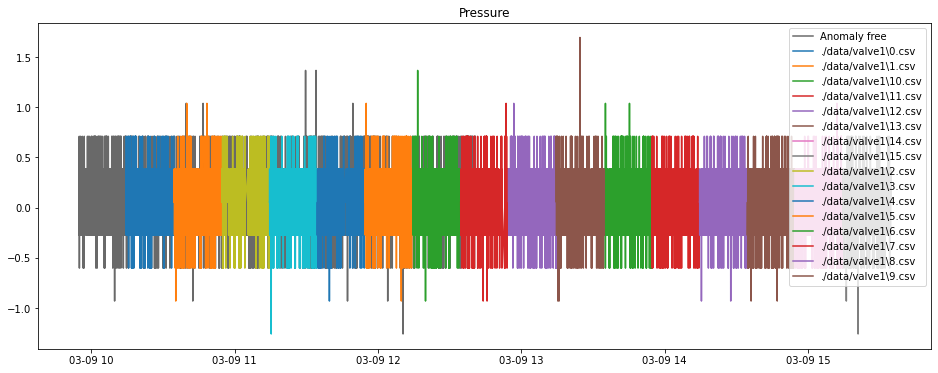

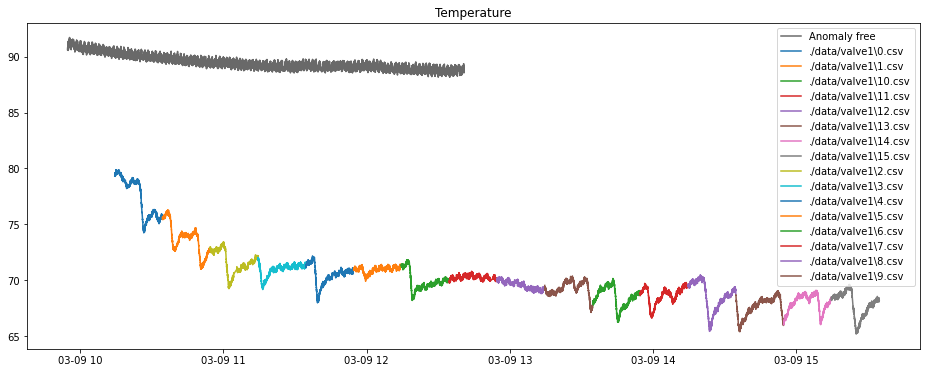

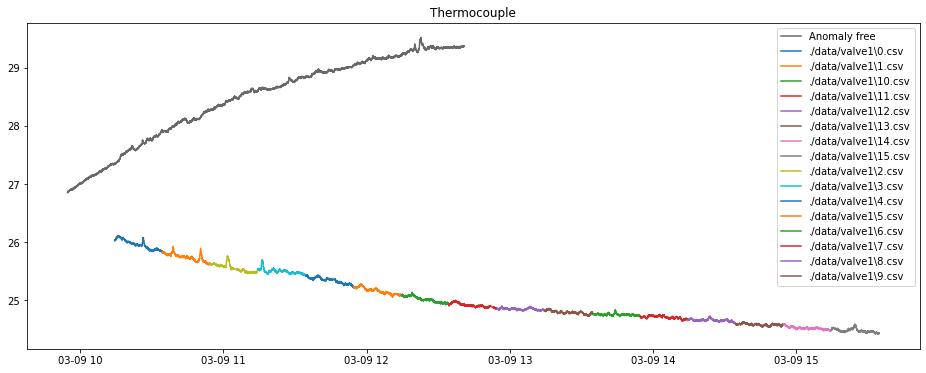

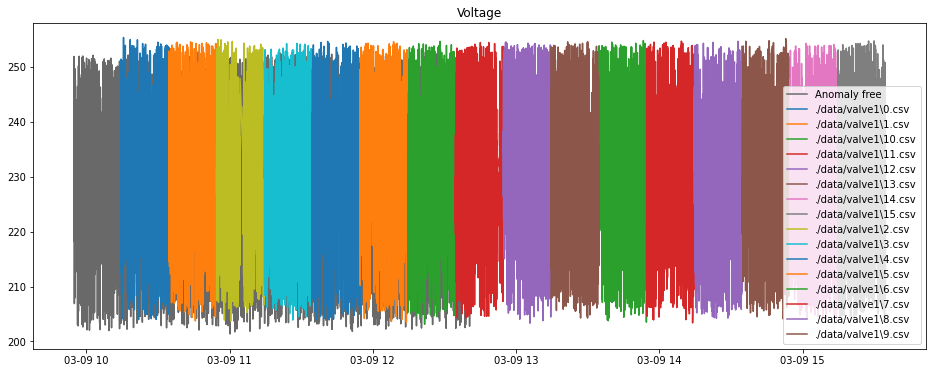

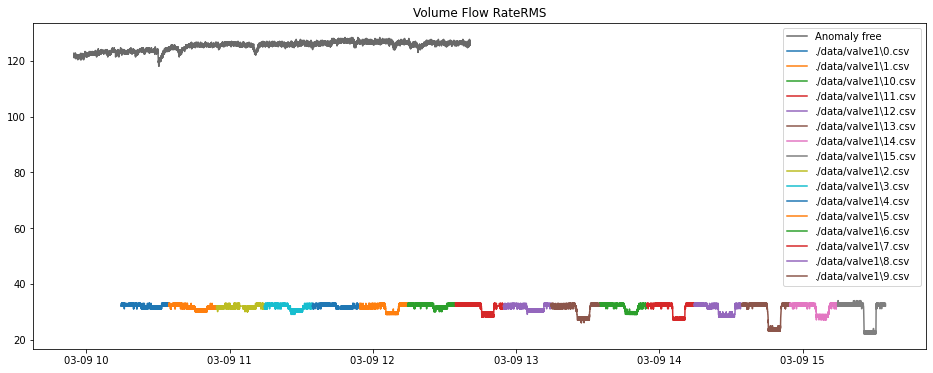

In [6]:

for feature in features:
    fig, ax = plt.subplots(figsize=(16,6))
    #an_free
    anfr_f = df_an_fr[feature]
    plt.plot(pd.Series(anfr_f.values, index = anfr_f.index.shift(29.85, freq="D")), color="dimgray")
    
    for df in list_of_df:
        prefix_len = get_healthy_prefix_len(df)        
        ax.plot(df[feature])
        
    
    ax.set_title(feature)
    ax.legend(["Anomaly free"] + file_names)
    plt.show()  

#### valve 2 & anomaly_free

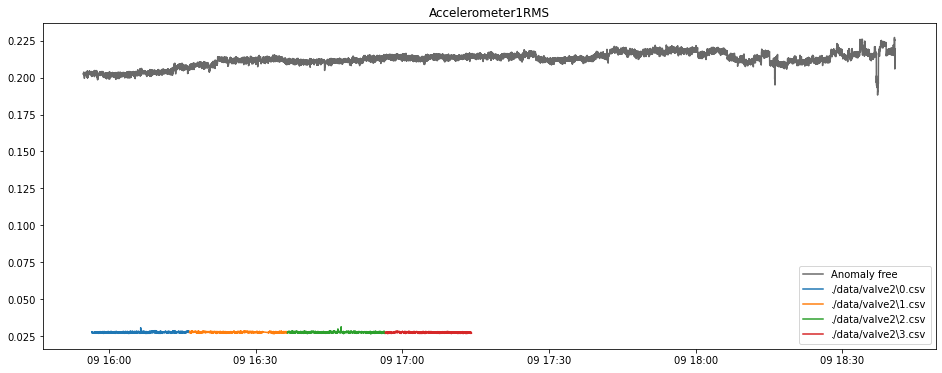

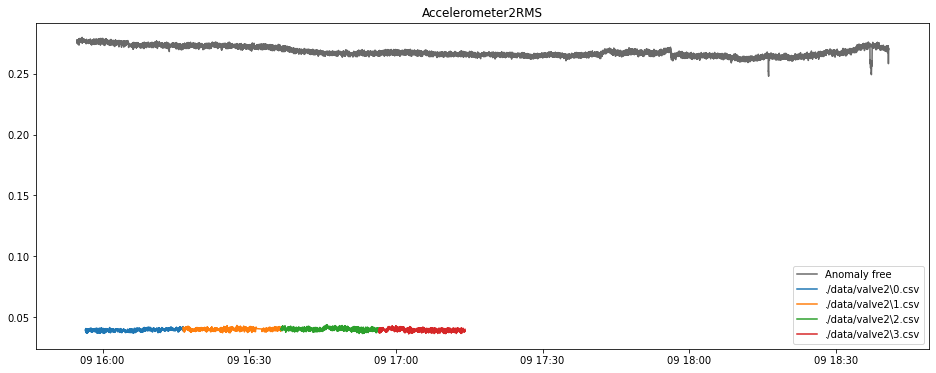

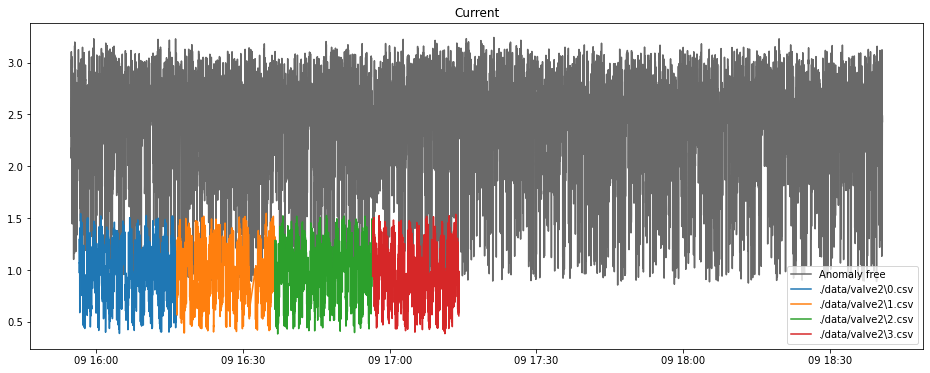

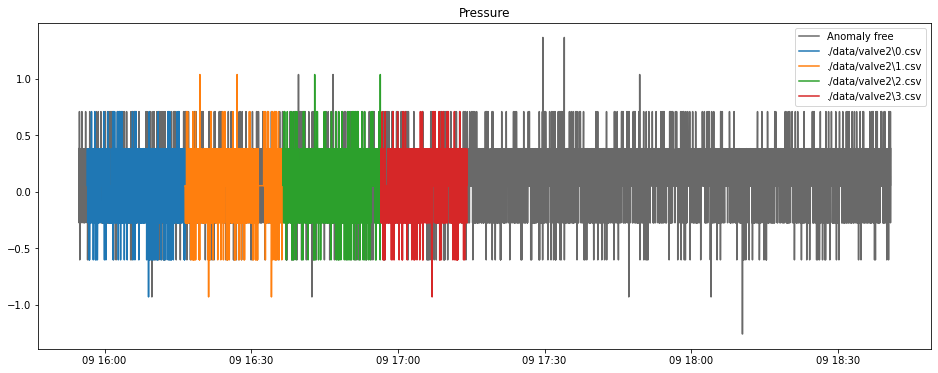

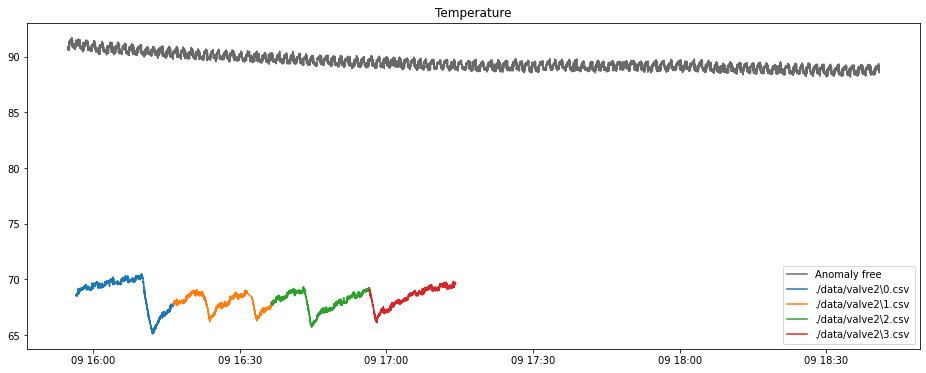

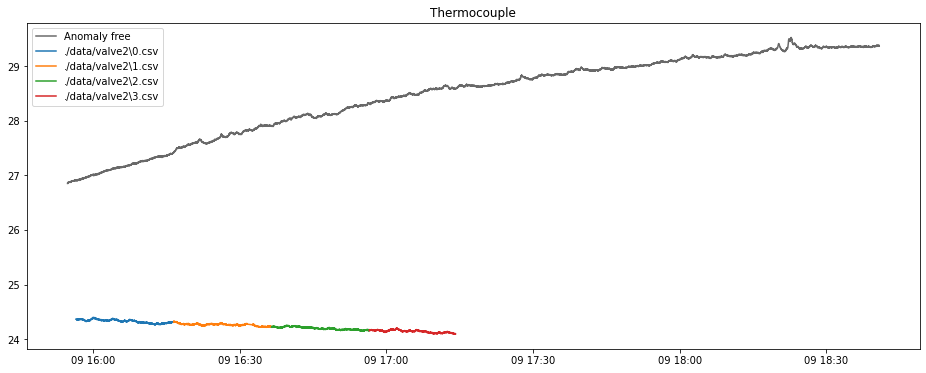

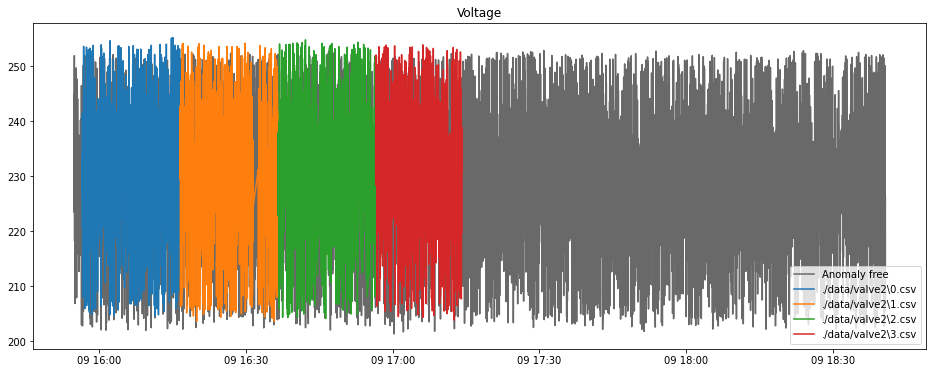

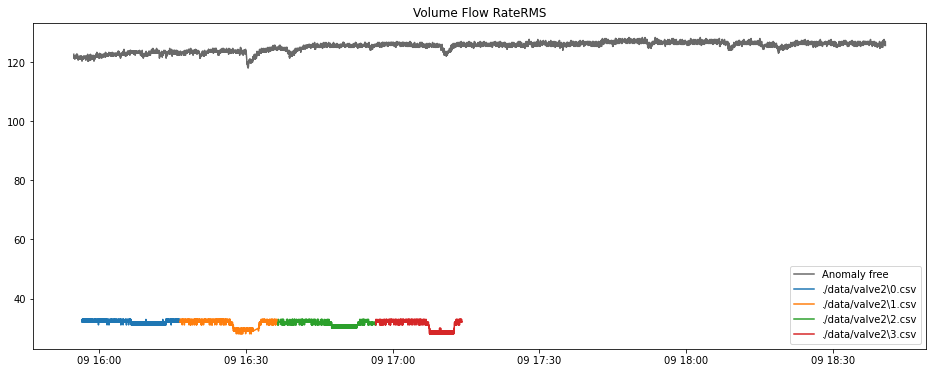

In [7]:
list_of_df, _, file_names = load_df_with_names("./data/", "valve2")

for feature in features:
    fig, ax = plt.subplots(figsize=(16,6))
    
    #an_free
    anfr_f = df_an_fr[feature]
    plt.plot(pd.Series(anfr_f.values, index = anfr_f.index.shift(30.1, freq="D")), color="dimgray")
    
    for df in list_of_df:
        prefix_len = get_healthy_prefix_len(df)        
        ax.plot(df[feature])
        
    
    ax.set_title(feature)
    ax.legend(["Anomaly free"] + file_names)
    plt.show()  

#### valve 1

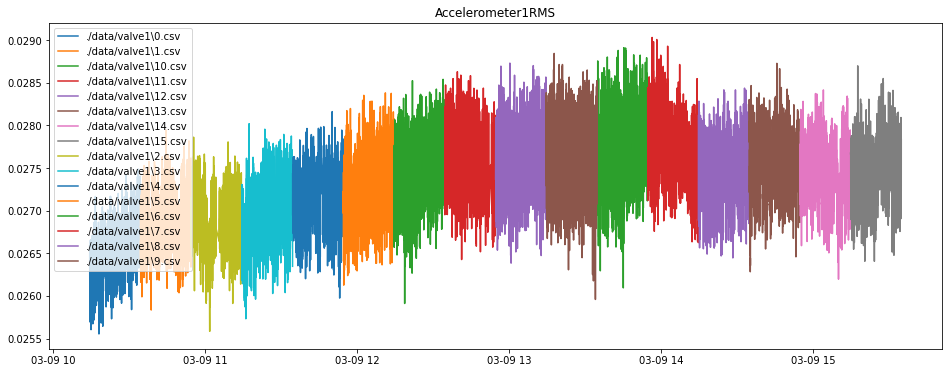

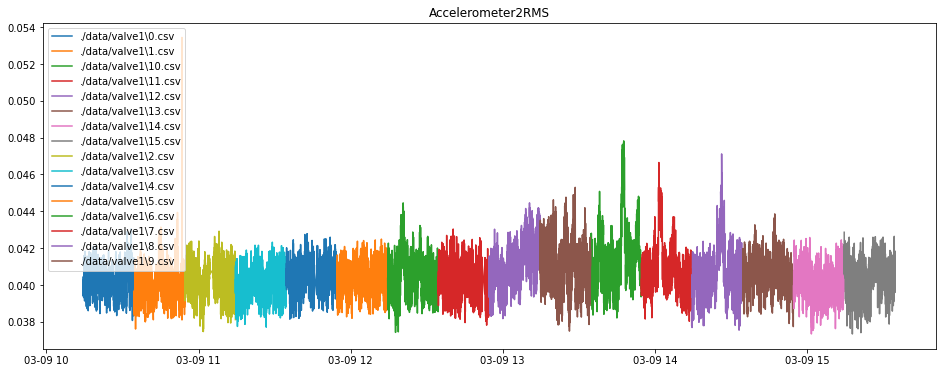

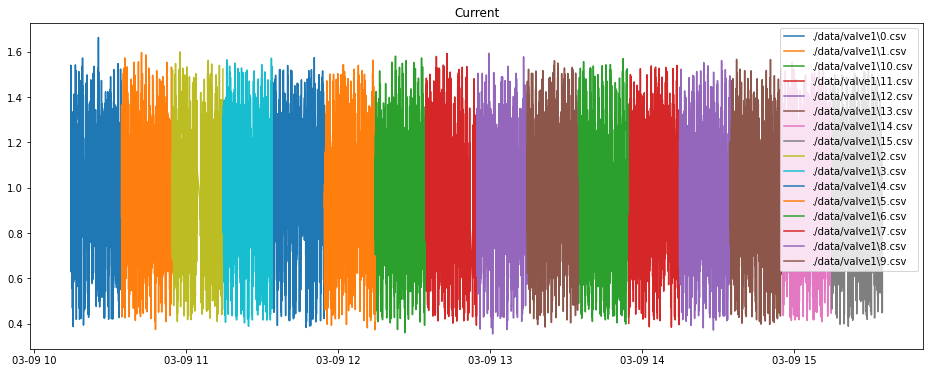

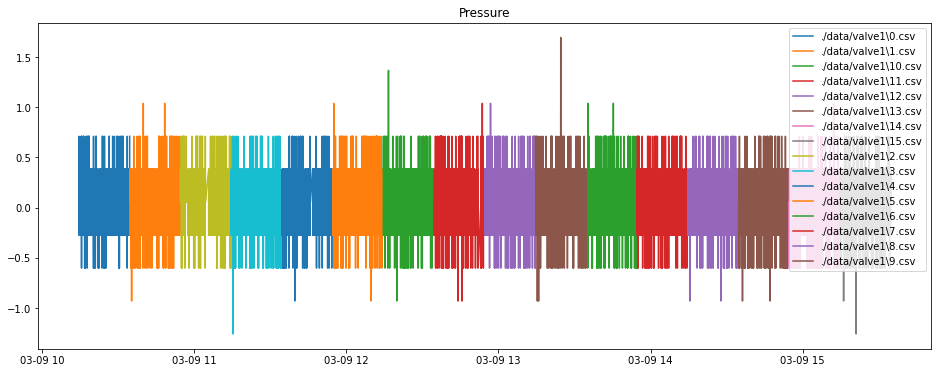

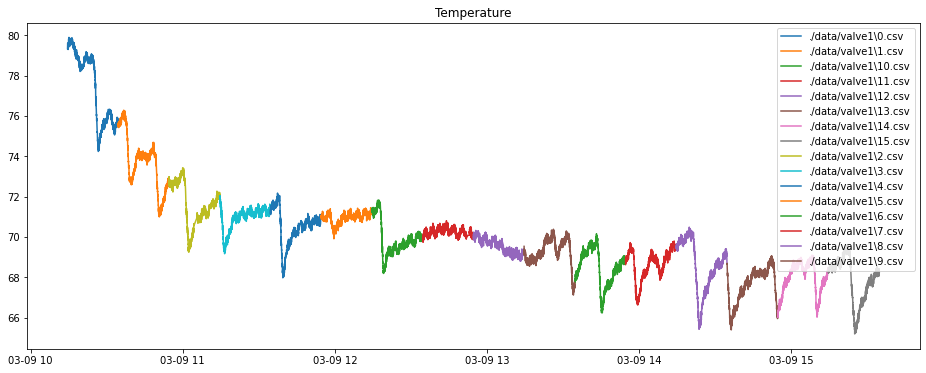

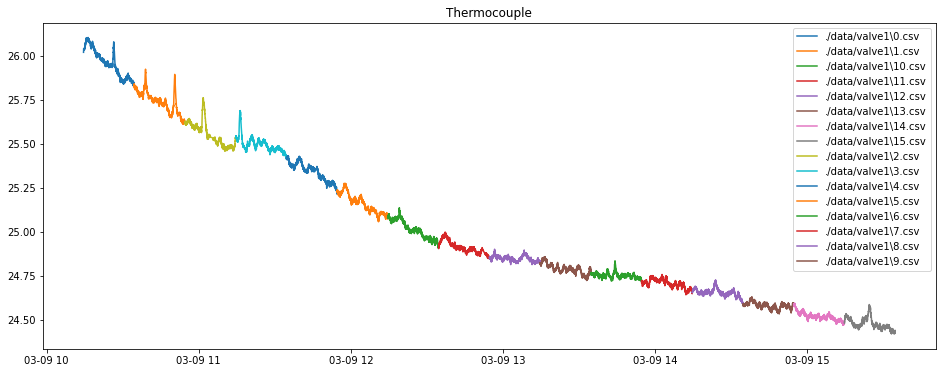

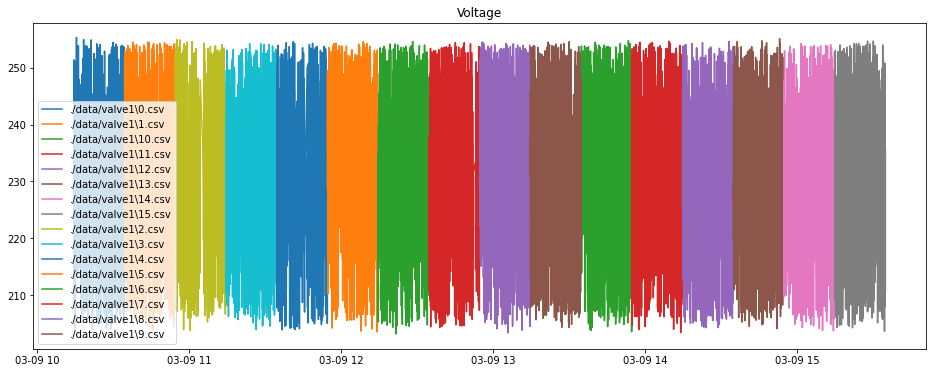

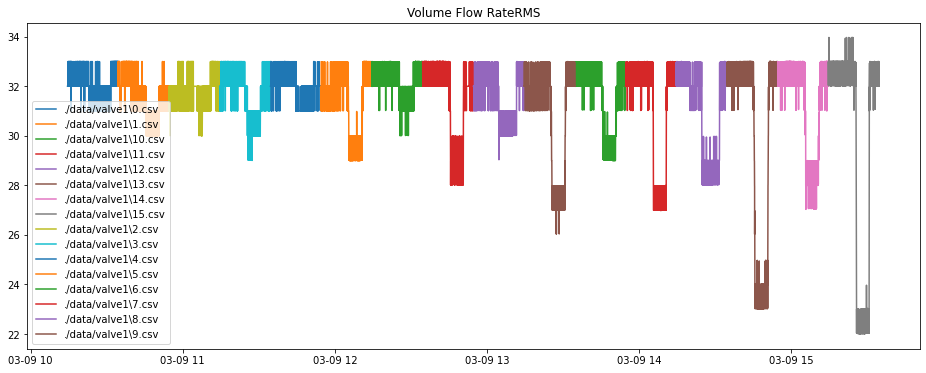

In [8]:
list_of_df, _, file_names = load_df_with_names("./data/", "valve1")

for feature in features:
    fig, ax = plt.subplots(figsize=(16,6))
    
    for df in list_of_df:
        prefix_len = get_healthy_prefix_len(df)        
        ax.plot(df[feature])
        
    
    ax.set_title(feature)
    ax.legend(file_names)
    plt.show()  

#### valve 2

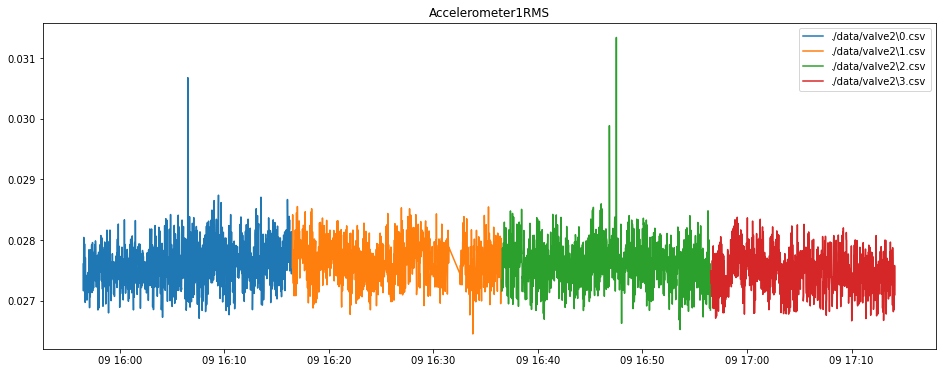

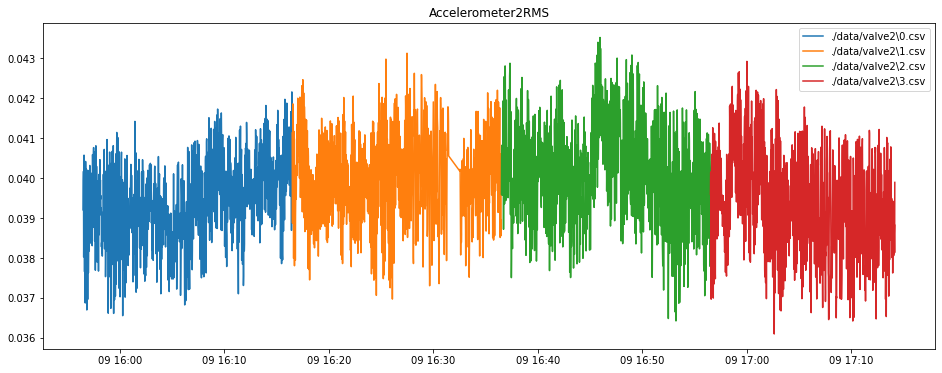

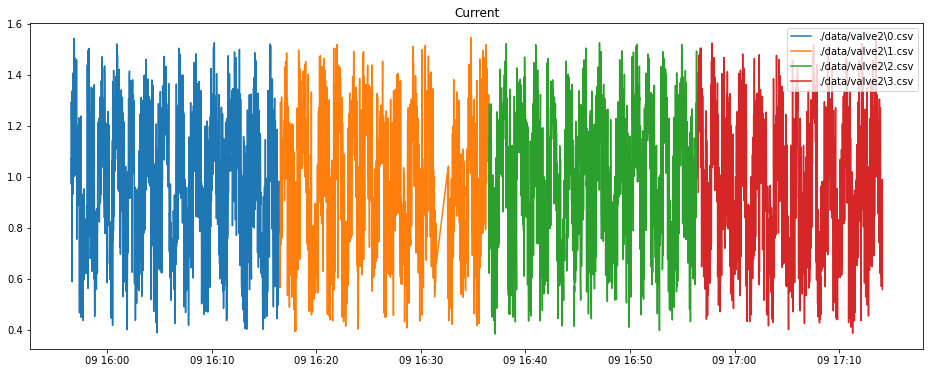

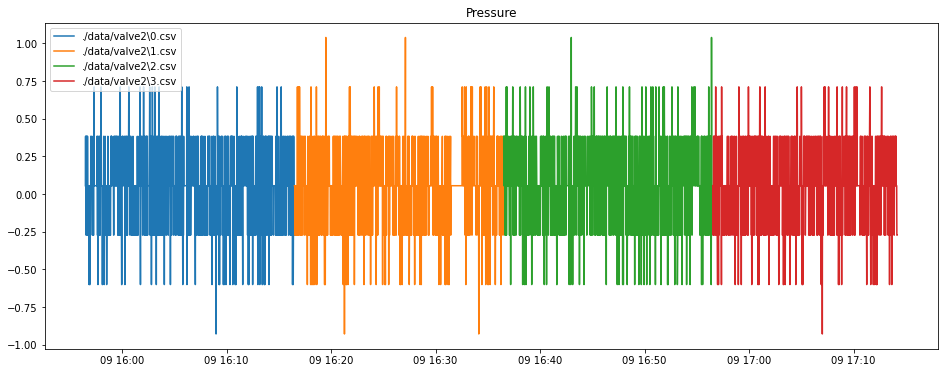

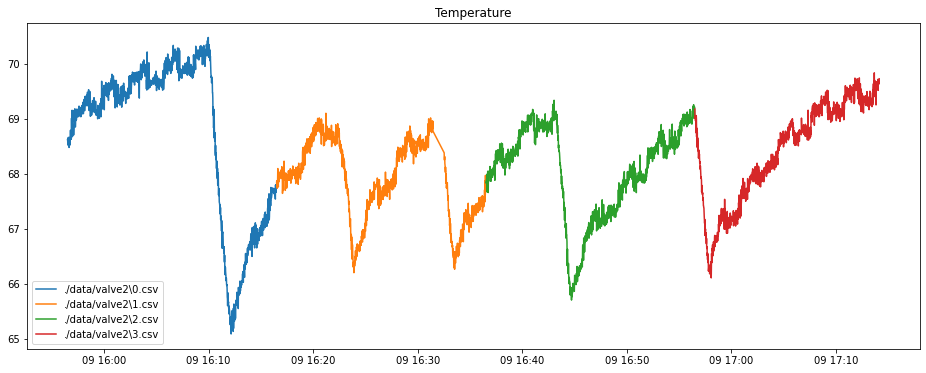

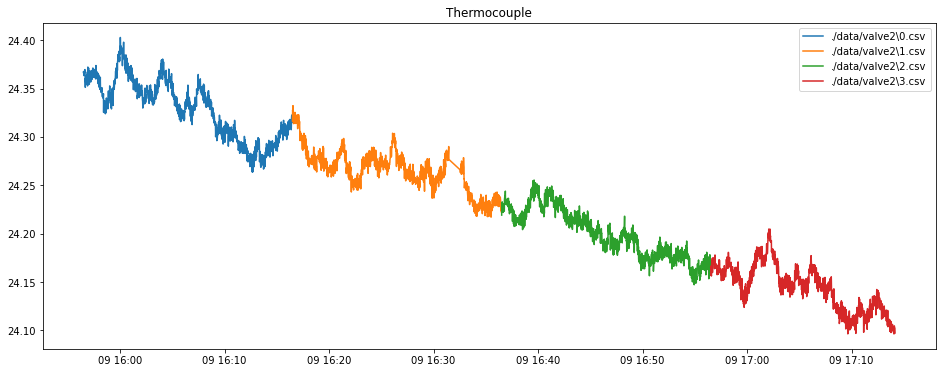

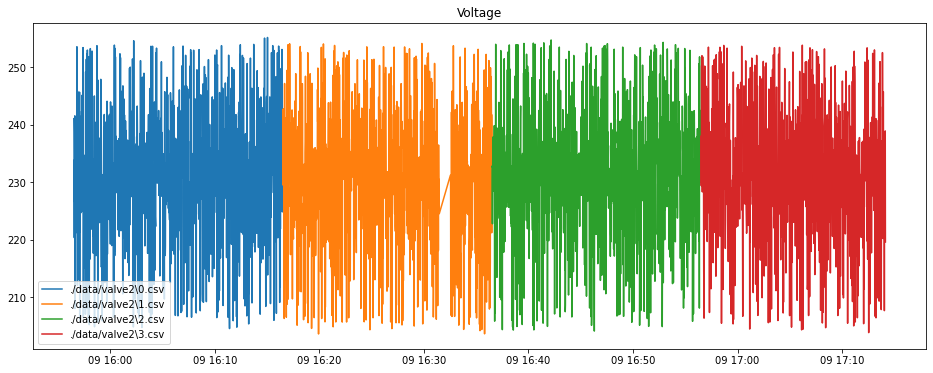

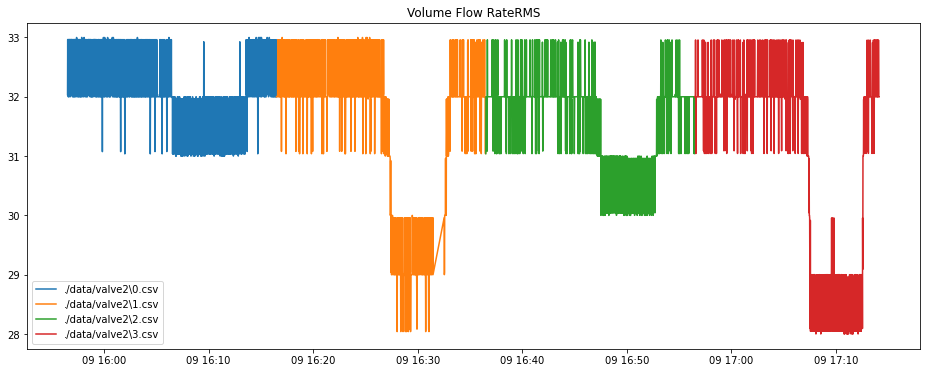

In [9]:
list_of_df, _, file_names = load_df_with_names("./data/", "valve2")

for feature in features:
    fig, ax = plt.subplots(figsize=(16,6))
    
    for df in list_of_df:
        prefix_len = get_healthy_prefix_len(df)        
        ax.plot(df[feature])
        
    
    ax.set_title(feature)
    ax.legend(file_names)
    plt.show()  

#### other


##### other March ( 1 - 4 .csv)

├── 1.csv               # Simulation of fluid leaks and fluid additions   
├── 2.csv               # Simulation of fluid leaks and fluid additions    
├── 3.csv               # Simulation of fluid leaks and fluid additions    
├── 4.csv               # Simulation of fluid leaks and fluid additions 

In [10]:
list_of_df, _, file_names = load_df_with_names("./data/", "other")

l = sorted(zip(list_of_df, file_names), key = lambda x: x[0].index[0])
all_list_of_df = [t[0] for t in l]
all_file_names = [t[1] for t in l ]

list_of_df=all_list_of_df[-4:]
file_names=all_file_names[-4:]
# sorted([d.index[0] for d in list_of_df])

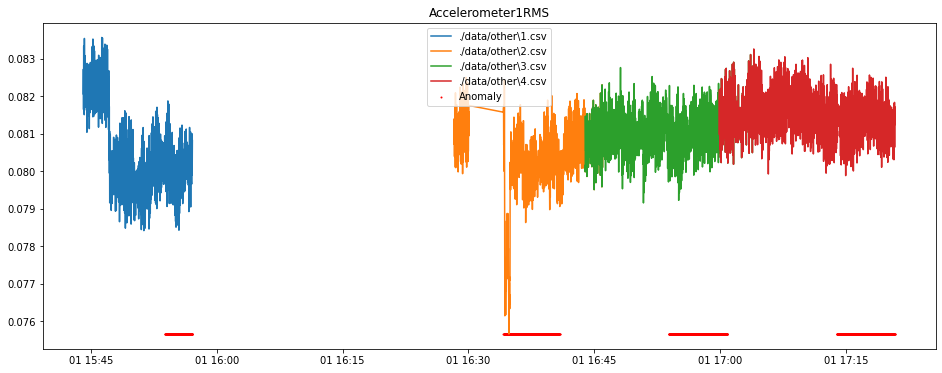

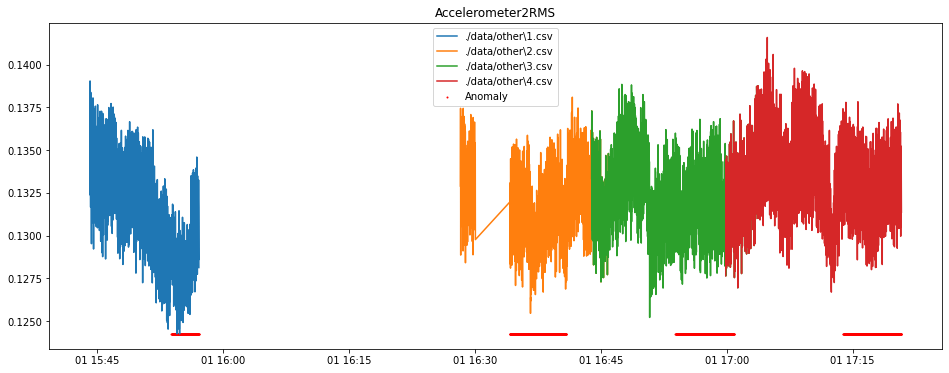

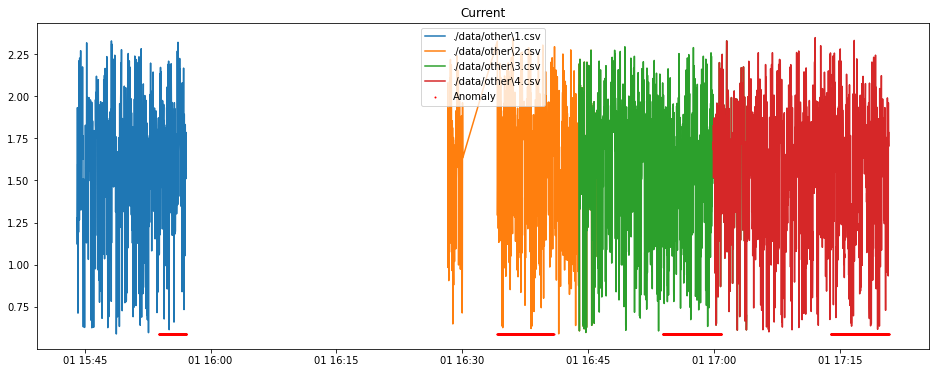

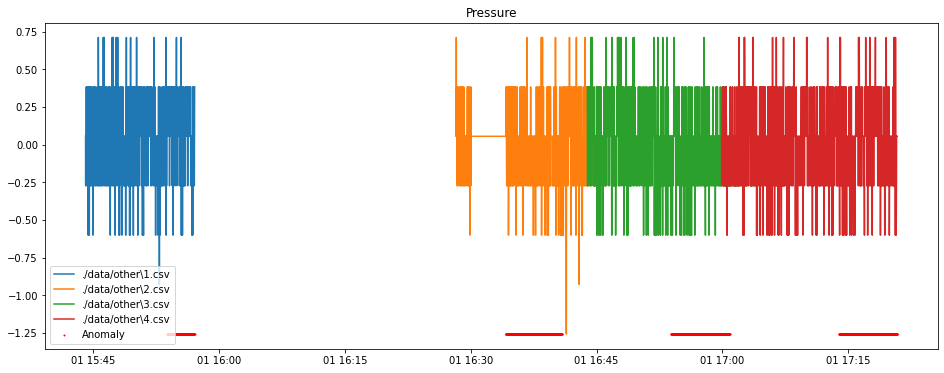

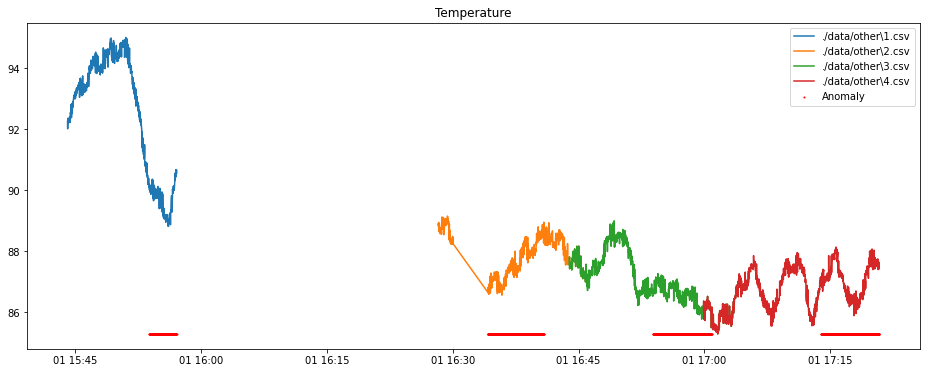

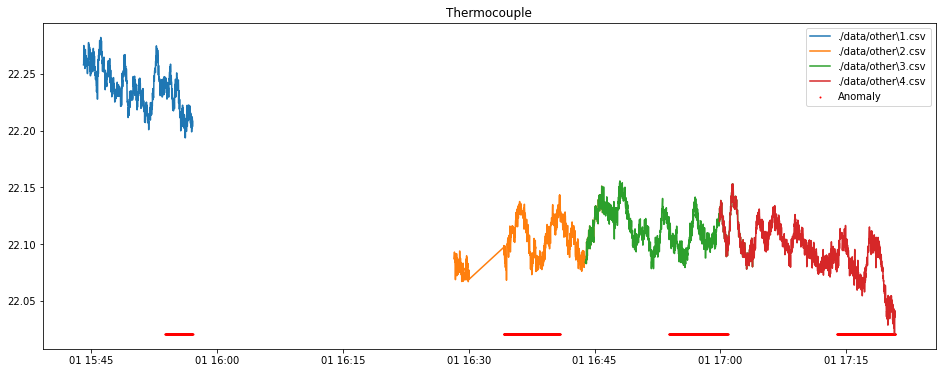

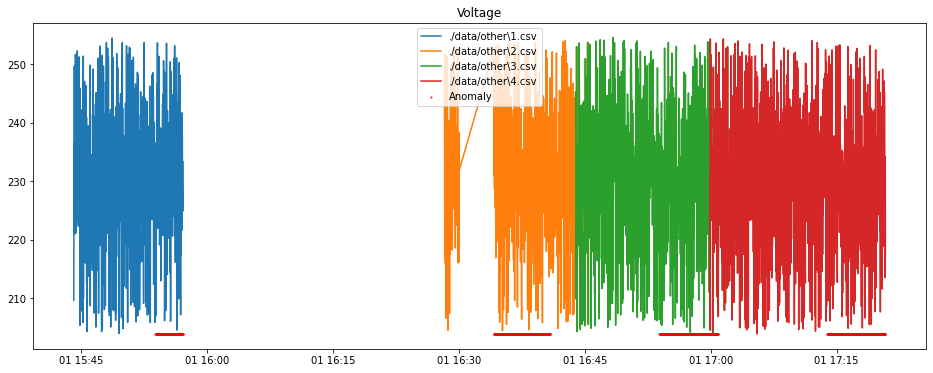

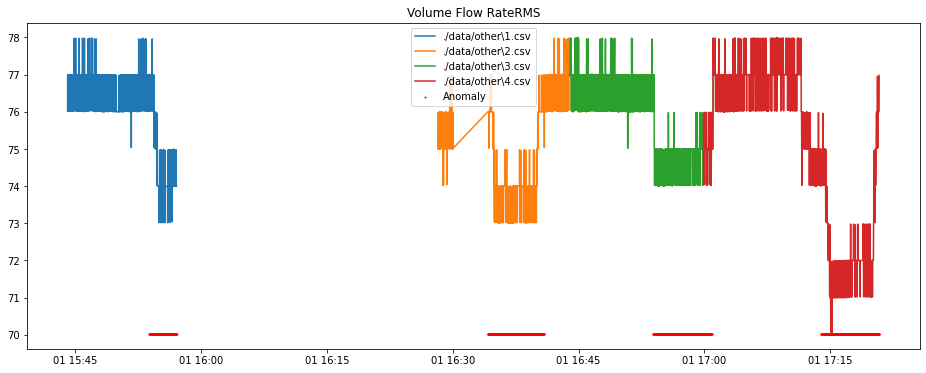

In [11]:
others_mins = pd.concat(list_of_df).min()

for feature in features:
    fig, ax = plt.subplots(figsize=(16,6))
    
    for df in list_of_df:
        prefix_len = get_healthy_prefix_len(df)        
        ax.plot(df[feature])
        
    an = pd.concat([d.anomaly for d in list_of_df])
    an = an[an>0]
    
    ax.scatter(an.index, [others_mins[feature] for _ in an.index], color='r', s=1)
    
    ax.set_title(feature)
    ax.legend(file_names + ["Anomaly"])
    plt.show()  

##### other February ( 5 - 14 .csv)

├── 5.csv               # Sharply behavior of rotor imbalance    
├── 6.csv               # Linear behavior of rotor imbalance   
├── 7.csv               # Step behavior of rotor imbalance   
├── 8.csv               # Dirac delta function behavior of rotor imbalance   
├── 9.csv               # Exponential behavior of rotor imbalance   
├── 10.csv              # The slow increase in the amount of water in the circuit   
├── 11.csv              # The sudden increase in the amount of water in the circuit   
├── 12.csv              # Draining water from the tank until cavitation   
├── 13.csv              # Two-phase flow supply to the pump inlet (cavitation)   
└── 14.csv              # Water supply of increased temperature   

In [12]:
list_of_df=all_list_of_df[:-4]
file_names=all_file_names[:-4]
# sorted([d.index[0] for d in list_of_df])

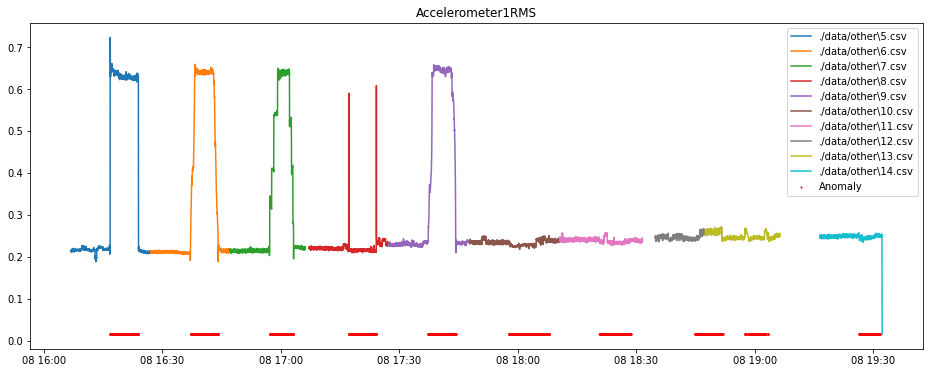

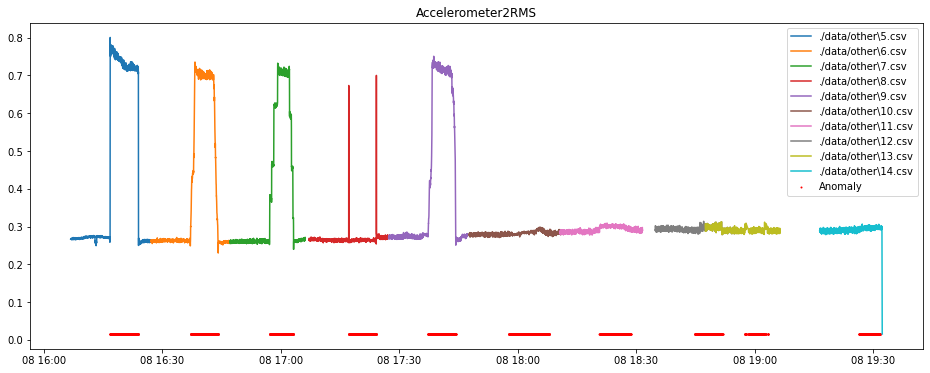

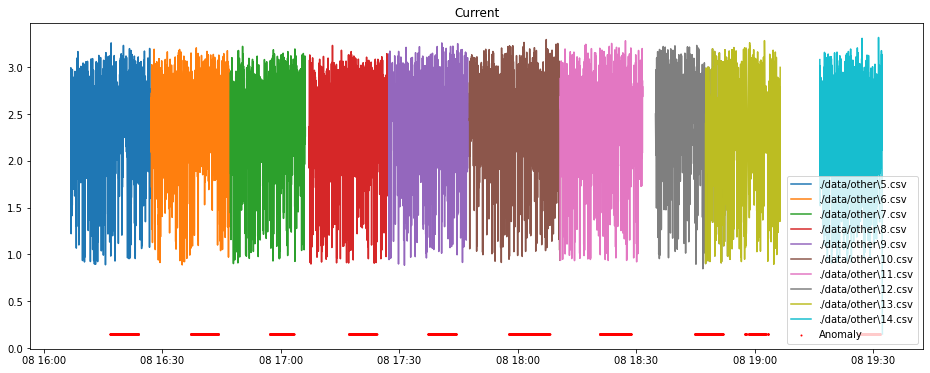

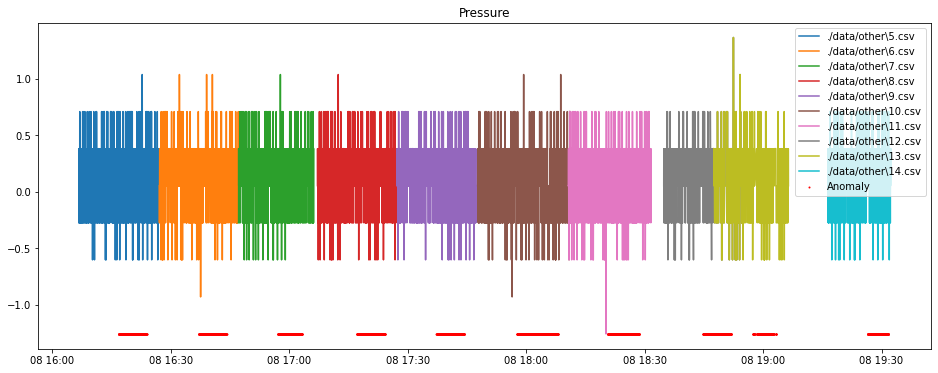

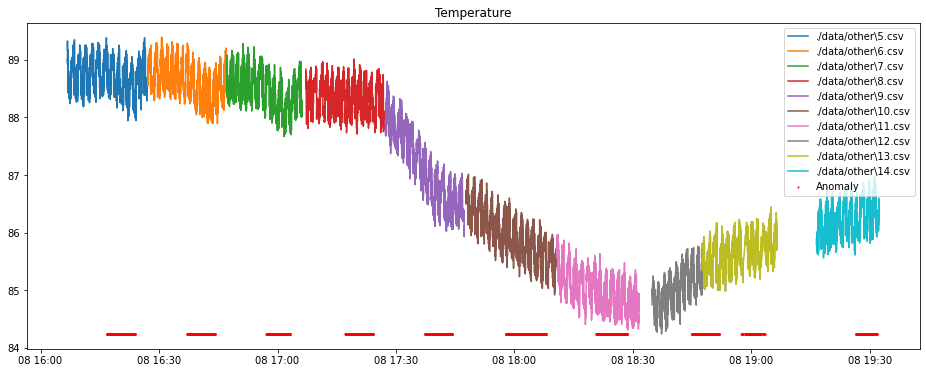

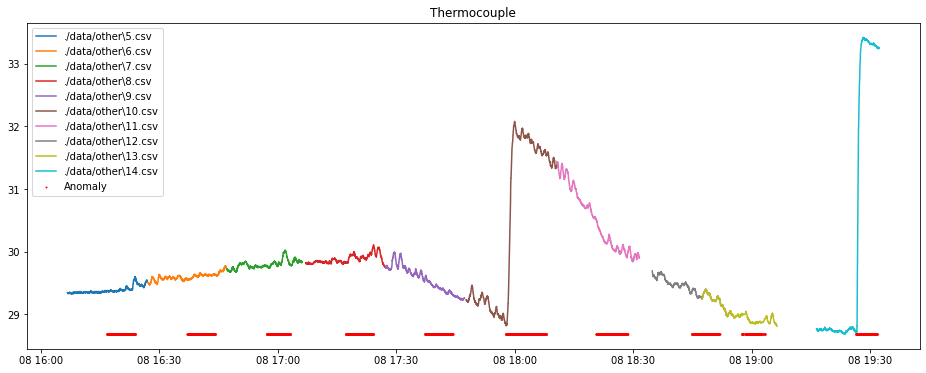

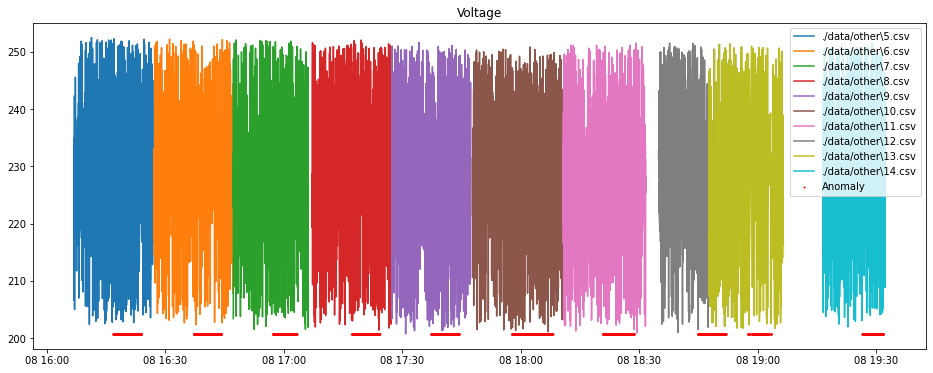

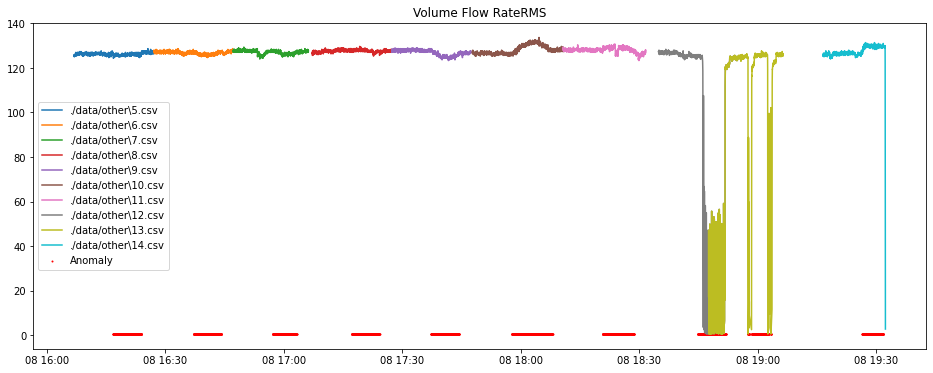

In [13]:
others_mins = pd.concat(list_of_df).min()

for feature in features:
    fig, ax = plt.subplots(figsize=(16,6))
    
    for df in list_of_df:
        prefix_len = get_healthy_prefix_len(df)        
        ax.plot(df[feature])
        
    an = pd.concat([d.anomaly for d in list_of_df])
    an = an[an>0]
    
    ax.scatter(an.index, [others_mins[feature] for _ in an.index], color='r', s=1)
    
    ax.set_title(feature)
    ax.legend(file_names + ["Anomaly"])
    plt.show()  

## Periods

In [23]:
list_of_df, _, file_names = load_df_with_names("./data/", "valve1")

for df, file_name in sorted(zip(list_of_df, file_names), key = lambda x: x[0].index[0]):
    print(f" {file_name}. experiment started at {df.index[0]}")    
    print(f" {file_name}. valve closed at {df.index[df.anomaly==1][0]}")    
    print(f" {file_name}. valve opened at {df.index[df.anomaly==1][-1]}")  
    
    print('-'*10)

 ./data/valve1\0.csv. experiment started at 2020-03-09 10:14:33
 ./data/valve1\0.csv. valve closed at 2020-03-09 10:24:33
 ./data/valve1\0.csv. valve opened at 2020-03-09 10:31:32
----------
 ./data/valve1\1.csv. experiment started at 2020-03-09 10:34:33
 ./data/valve1\1.csv. valve closed at 2020-03-09 10:44:33
 ./data/valve1\1.csv. valve opened at 2020-03-09 10:51:33
----------
 ./data/valve1\2.csv. experiment started at 2020-03-09 10:54:34
 ./data/valve1\2.csv. valve closed at 2020-03-09 11:05:40
 ./data/valve1\2.csv. valve opened at 2020-03-09 11:11:33
----------
 ./data/valve1\3.csv. experiment started at 2020-03-09 11:14:34
 ./data/valve1\3.csv. valve closed at 2020-03-09 11:24:34
 ./data/valve1\3.csv. valve opened at 2020-03-09 11:31:35
----------
 ./data/valve1\4.csv. experiment started at 2020-03-09 11:34:36
 ./data/valve1\4.csv. valve closed at 2020-03-09 11:44:36
 ./data/valve1\4.csv. valve opened at 2020-03-09 11:51:34
----------
 ./data/valve1\5.csv. experiment started at 2

Вывод: эксперимент идет 20 минут. 10 минут - здоровые данные, 7 минут - аномальные, 3 минуты - здоровые